In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout
from keras.models import Sequential
from sklearn.metrics import accuracy_score

tf.random.set_seed(42)

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

np.random.seed(42)

file_path = '/content/drive/My Drive/an-ninh-mang/dataset/UNSW-NB15/UNSW_NB15_training-set.csv'
df_train = pd.read_csv(file_path)

file_path = '/content/drive/My Drive/an-ninh-mang/dataset/UNSW-NB15/UNSW_NB15_testing-set.csv'
df_test = pd.read_csv(file_path)

df_train['Data_Type'] = 1
df_test['Data_Type'] = 0

df = pd.concat([df_train, df_test], ignore_index=True)

df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label,Data_Type
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,0,0,0,1,1,0,Normal,0,1
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,2,0,0,0,1,6,0,Normal,0,1
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,3,0,0,0,2,6,0,Normal,0,1
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,3,1,1,0,2,1,0,Normal,0,1
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,40,0,0,0,2,39,0,Normal,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,...,2,0,0,0,2,1,0,Normal,0,0
257669,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,...,1,0,0,0,3,2,0,Normal,0,0
257670,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,0,0,0,1,1,1,Normal,0,0
257671,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,0,0,0,1,1,1,Normal,0,0


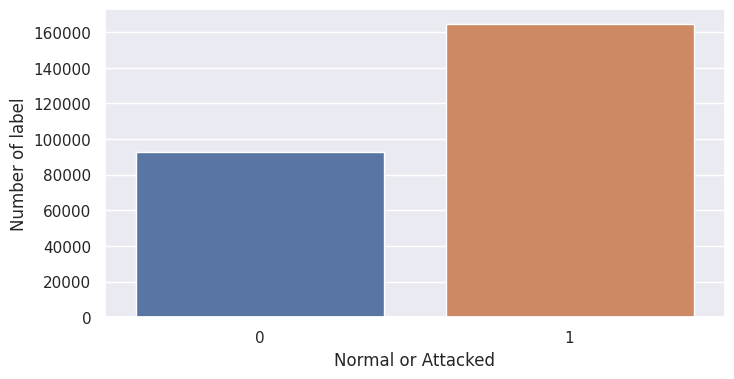

In [56]:
sns.set(rc={'figure.figsize':(8, 4)})
plt.xlabel('Status')
sns.set_theme()
ax = sns.countplot(x='label', data=df)
ax.set(xlabel='Normal or Attacked', ylabel='Number of label')
plt.show()

In [57]:
list_drop = ['attack_cat', 'id']
df.drop(list_drop,axis=1,inplace=True)

In [58]:
df.shape

(257673, 44)

# **Encoding the categorical data - OneHot Encoding**



In [59]:
data_cat = df.select_dtypes(exclude=[np.number])
data_cat.describe(include='all')

,proto,service,state
count,257673,257673,257673
unique,133,13,11
top,tcp,-,FIN
freq,123041,141321,117164


In [60]:
columns_to_encode = data_cat.columns
last_two_columns = df.iloc[:, -2:]
df = df.iloc[:, :-2]

one_hot_encoded = pd.get_dummies(df, columns=columns_to_encode)
df = pd.concat([one_hot_encoded, last_two_columns], axis=1)


In [61]:
df

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no,label,Data_Type
0,0.121478,6,4,258,172,74.087490,252,254,1.415894e+04,8495.365234,...,0,1,0,0,0,0,0,0,0,1
1,0.649902,14,38,734,42014,78.473372,62,252,8.395112e+03,503571.312500,...,0,1,0,0,0,0,0,0,0,1
2,1.623129,8,16,364,13186,14.170161,62,252,1.572272e+03,60929.230470,...,0,1,0,0,0,0,0,0,0,1
3,1.681642,12,12,628,770,13.677108,62,252,2.740179e+03,3358.622070,...,0,1,0,0,0,0,0,0,0,1
4,0.449454,10,6,534,268,33.373826,254,252,8.561499e+03,3987.059814,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,0.000005,2,0,104,0,200000.005100,254,0,8.320000e+07,0.000000,...,0,0,1,0,0,0,0,0,0,0
257669,1.106101,20,8,18062,354,24.410067,254,252,1.241044e+05,2242.109863,...,0,1,0,0,0,0,0,0,0,0
257670,0.000000,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,...,0,0,1,0,0,0,0,0,0,0
257671,0.000000,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,...,0,0,1,0,0,0,0,0,0,0


In [62]:
df.isnull().sum().to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# **Fillna**

In [63]:
df2 = df.copy()
df2.fillna(df2.mean(), inplace=True)
print(df2.isna().sum().to_numpy())

df2

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no,label,Data_Type
0,0.121478,6,4,258,172,74.087490,252,254,1.415894e+04,8495.365234,...,0,1,0,0,0,0,0,0,0,1
1,0.649902,14,38,734,42014,78.473372,62,252,8.395112e+03,503571.312500,...,0,1,0,0,0,0,0,0,0,1
2,1.623129,8,16,364,13186,14.170161,62,252,1.572272e+03,60929.230470,...,0,1,0,0,0,0,0,0,0,1
3,1.681642,12,12,628,770,13.677108,62,252,2.740179e+03,3358.622070,...,0,1,0,0,0,0,0,0,0,1
4,0.449454,10,6,534,268,33.373826,254,252,8.561499e+03,3987.059814,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,0.000005,2,0,104,0,200000.005100,254,0,8.320000e+07,0.000000,...,0,0,1,0,0,0,0,0,0,0
257669,1.106101,20,8,18062,354,24.410067,254,252,1.241044e+05,2242.109863,...,0,1,0,0,0,0,0,0,0,0
257670,0.000000,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,...,0,0,1,0,0,0,0,0,0,0
257671,0.000000,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,...,0,0,1,0,0,0,0,0,0,0


# **Feature scaling - Standard Scaler**

In [64]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = df2.columns[:-2]
sta = StandardScaler()
df2[columns_to_scale] = sta.fit_transform(df2[columns_to_scale])

df2

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no,label,Data_Type
0,-0.188346,-0.101342,-0.129612,-0.047849,-0.097232,-0.568650,0.702512,1.500906,-0.380090,-0.269328,...,-0.006824,1.095103,-0.907980,-0.00197,-0.122882,-0.018058,-0.00197,-0.00197,0,1
1,-0.099897,-0.042496,0.173998,-0.045110,0.188966,-0.568623,-1.151363,1.483170,-0.380121,-0.064104,...,-0.006824,1.095103,-0.907980,-0.00197,-0.122882,-0.018058,-0.00197,-0.00197,0,1
2,0.063006,-0.086630,-0.022456,-0.047239,-0.008217,-0.569024,-1.151363,1.483170,-0.380158,-0.247593,...,-0.006824,1.095103,-0.907980,-0.00197,-0.122882,-0.018058,-0.00197,-0.00197,0,1
3,0.072800,-0.057207,-0.058174,-0.045720,-0.093142,-0.569027,-1.151363,1.483170,-0.380152,-0.271458,...,-0.006824,1.095103,-0.907980,-0.00197,-0.122882,-0.018058,-0.00197,-0.00197,0,1
4,-0.133449,-0.071919,-0.111753,-0.046261,-0.096576,-0.568904,0.722026,1.483170,-0.380121,-0.271197,...,-0.006824,1.095103,-0.907980,-0.00197,-0.122882,-0.018058,-0.00197,-0.00197,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,-0.208679,-0.130765,-0.165331,-0.048736,-0.098409,0.678204,0.722026,-0.751628,0.067793,-0.272850,...,-0.006824,-0.913156,1.101346,-0.00197,-0.122882,-0.018058,-0.00197,-0.00197,0,0
257669,-0.023537,0.001639,-0.093893,0.054606,-0.095988,-0.568960,0.722026,1.483170,-0.379498,-0.271921,...,-0.006824,1.095103,-0.907980,-0.00197,-0.122882,-0.018058,-0.00197,-0.00197,0,0
257670,-0.208680,-0.138121,-0.165331,-0.049069,-0.098409,-0.569112,-1.756311,-0.751628,-0.380167,-0.272850,...,-0.006824,-0.913156,1.101346,-0.00197,-0.122882,-0.018058,-0.00197,-0.00197,0,0
257671,-0.208680,-0.138121,-0.165331,-0.049069,-0.098409,-0.569112,-1.756311,-0.751628,-0.380167,-0.272850,...,-0.006824,-0.913156,1.101346,-0.00197,-0.122882,-0.018058,-0.00197,-0.00197,0,0


In [65]:
print(df['label'].value_counts())

1    164673
0     93000
Name: label, dtype: int64


# **Splitting the dataset**

In [66]:
train_data = df2[df2['Data_Type'] == 1]
test_data = df2[df2['Data_Type'] == 0]

train_data = train_data.drop('Data_Type', axis=1)
test_data = test_data.drop('Data_Type', axis=1)

In [67]:
test_data.shape

(82332, 197)

In [68]:
X_train = train_data.drop('label', axis=1)
y_train = train_data['label']

X_test = test_data.drop('label', axis=1)
y_test = test_data['label']


# Training

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support

def plot_confusion_matrix(confusion_matrix, class_names):
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, square=True, xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

def evaluate_classification_with_plot(truth, predicted, threshold=0.5, class_names=['Bengin', 'Malicious']):
    predicted_binary = (predicted > threshold).astype(int)

    confusion = confusion_matrix(truth, predicted_binary)


    accuracy = accuracy_score(truth, predicted_binary)
    print("Accuracy:", accuracy)

    precision, recall, f1, _ = precision_recall_fscore_support(truth, predicted_binary, average='binary')
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)

    plot_confusion_matrix(confusion, class_names)

    return accuracy

In [70]:
train_list = ['stcpb', 'dtcpb', 'rate', 'swin', 'dwin', 'sload', 'sttl', 'dload', 'dttl', 'proto_tcp', 'state_FIN', 'dmean', 'smean', 'state_INT', 'ct_dst_src_ltm', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'service_-', 'ct_srv_dst', 'proto_udp', 'djit']
print(f"Số lượng features có được khi mình chạy thực tế: {len(train_list)}")
train_list_paper = train_list[:21]
print(f"Số lượng features theo paper: {len(train_list_paper)}")

Số lượng features có được khi mình chạy thực tế: 22
Số lượng features theo paper: 21


Epoch 1/10
1370/1370 [==============================] - 7s 4ms/step - loss: 0.1834 - accuracy: 0.9229 - val_loss: 0.3405 - val_accuracy: 0.8190
Epoch 2/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.1450 - accuracy: 0.9347 - val_loss: 0.2857 - val_accuracy: 0.8175
Epoch 3/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.1399 - accuracy: 0.9355 - val_loss: 0.3017 - val_accuracy: 0.8277
Epoch 4/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.1363 - accuracy: 0.9362 - val_loss: 0.2954 - val_accuracy: 0.8333
Epoch 5/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.1334 - accuracy: 0.9370 - val_loss: 0.2911 - val_accuracy: 0.8402
Epoch 6/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.1320 - accuracy: 0.9376 - val_loss: 0.2951 - val_accuracy: 0.8322
Epoch 7/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.1309 - accuracy: 0.9380 - val_loss: 0.2918 - val_accuracy:

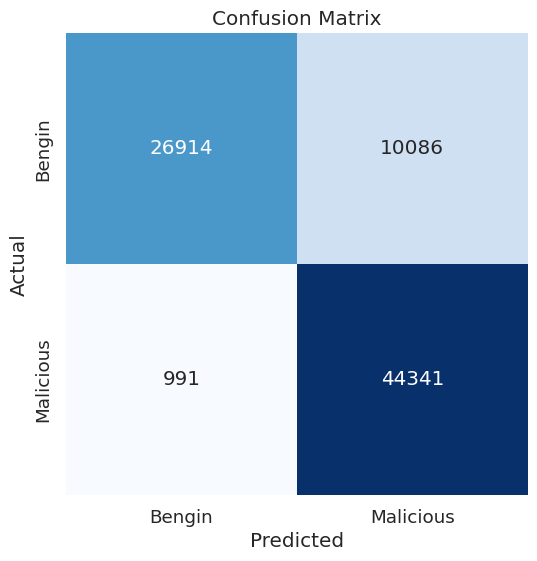

In [71]:
X_train_copy = X_train[train_list_paper]
X_test_copy = X_test[train_list_paper]

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(len(train_list_paper),)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_copy, y_train, epochs=10, batch_size=128, validation_data=(X_test_copy, y_test))
y_pred = model.predict(X_test_copy)

accuracy = evaluate_classification_with_plot(y_test, y_pred, class_names=['Bengin', 'Malicious'])

